# Lecture 3: Motion of a Single Plasma Particle

<ins>Reference</ins>: Ch. 3, *Bellan, Paul M. Fundamentals of plasma physics. Cambridge university press, 2008.*

## Guiding Center Approximation

The guiding center approximation is a simplification used in plasma physics to simplify the analysis of charged particle motion in a magnetic field. It is particularly useful when the gyration (circular motion) of particles around magnetic field lines is much faster than their drift motion. The key idea is to treat the particle as if it moves along a "guiding center" trajectory, which represents the average motion of the particle over many gyration periods.

In the guiding center approximation, the four drift velocities mentioned earlier can be calculated using various mathematical techniques, including averaging over the gyration motion. This approximation allows researchers to describe the particle's motion more conveniently, making it easier to analyze and predict the behavior of particles in complex magnetic field configurations.

By using the guiding center approximation and considering the four drift velocities, we can gain valuable insights into the behavior of charged particles in plasmas and magnetic confinement devices, ultimately advancing our understanding of fusion energy research and other plasma-related phenomena.

<div style="text-align:center">
    <figure>
        <img src="gc.svg" alt="Guiding Center Illustration" style="width: 600px;background-color: white;">
        <figcaption>Fig.1 Guiding Center</figcaption>
    </figure>
</div>

## Drift Theory

Drift theory is a framework used in plasma physics to describe the motion of charged particles in a magnetic field. It helps us understand how these particles move in addition to their gyration (circular motion) around magnetic field lines. Drift theory is particularly useful when analyzing the behavior of charged particles in a tokamak, a type of device used for controlled nuclear fusion research, or in other plasma confinement systems.

$$
\mathbf{v}_{\perp g c}=\mathbf{v}_E+\mathbf{v}_{\nabla B}+\mathbf{v}_c+\mathbf{v}_P
$$

In drift theory, there are four main drift velocities that describe particle motion:

1. **E × B Drift**:
   - Occurs due to the interaction between the electric field (E) and the magnetic field (B).
   - Particles experience a force perpendicular to both E and B, causing them to drift in a direction perpendicular to both E and B.

   $$\mathbf{v}_E=\frac{\mathbf{E} \times \mathbf{B}}{B^2}$$

2. **Grad B Drift**:
   - Results from spatial variations in the magnetic field strength (B).
   - Particles tend to drift from regions of lower magnetic field strength to regions of higher magnetic field strength.

   $$\mathbf{v}_{\nabla B}=-\frac{m v_{L 0}^2}{2 q B^3} \nabla B \times \mathbf{B}$$

3. **Curvature Drift**:
   - Arises when particles follow curved magnetic field lines.
   - Particles experience a drift motion perpendicular to the local curvature of the field lines.
   
   $$\mathbf{v}_c=-\frac{m v_{\| g c}^2}{q B^2} \widehat{B} \cdot \nabla \widehat{B} \times \mathbf{B}=\frac{1}{q B^2}\left(\frac{m v_{\| g c}^2 \hat{R}}{R}\right) \times \mathbf{B}$$

4. **Polarization Drift**:
   - A hgiher order drift velocity that arises from the time variation of the electric field (E) and magnetic field (B).
   
   $$\mathbf{v}_P=-\frac{m}{q B^2}\left[\frac{\mathrm{d}}{\mathrm{d} t}\left(\mathbf{v}_E+\mathbf{v}_{\nabla B}+\mathbf{v}_c\right)\right] \times \mathbf{B}$$

The four drift velocities described above play a crucial role in understanding the behavior of charged particles in magnetic fields, especially in complex plasma environments.

## Numerical Integration

Now it is useful to generalize our result from Lecture 2 for applying the method to any given temporal and spatial dependent field $\mathbf{E}(\mathbf{x},t)$ and $\mathbf{B}(\mathbf{x},t)$.

We can write the equation of motion as

$$
\begin{align*}
\frac{d\mathbf{x}}{dt} &= \mathbf{v} \\
\frac{d\mathbf{v}}{dt} &= \frac{q}{m} \left( \mathbf{E}(\mathbf{x},t) + \mathbf{v} \times \mathbf{B}(\mathbf{x},t) \right)
\end{align*}
$$

Let us define a state vector $\mathbf{z} = (\mathbf{x},\mathbf{v})$ and a vector field $\mathbf{F}(\mathbf{z},t) = (\mathbf{v},\frac{q}{m} \left( \mathbf{E}(\mathbf{x},t) + \mathbf{v} \times \mathbf{B}(\mathbf{x},t) \right))$.

Then the equation of motion becomes

$$
\frac{d\mathbf{z}}{dt} = \mathbf{F}(\mathbf{z},t)
$$

This is a first order ordinary differential equation (ODE) with initial condition $\mathbf{z}(t_0) = \mathbf{z}_0$, which can be solved numerically using the method described in Lecture 2.

Let us pick an implicit leapfrog method for the time integration. The method is second order accurate in time and symplectic, which means that it conserves the phase space volume. The method, previously derived, is given by


$$
\begin{align*}
v_\text{new} &= \dfrac{\mathbf{C} + \mathbf{A} \mathbf{A} \cdot \mathbf{C} - \mathbf{A} \times \mathbf{C}}{1+ A^2}\\
x_\text{new} &= x_\text{old} + v_\text{new} \Delta t 
\end{align*}
$$

where $\mathbf{A} = \mathbf{\Omega} \Delta t/2$, $\mathbf{C} = v_\text{old} + \Delta t (\mathbf{\Sigma}  + v_\text{old} \times \mathbf{\Omega}/2)$, $\mathbf{\Omega} = q\mathbf{B}/m$, and $\mathbf{\Sigma} = q\mathbf{E}/m$.

## 3D visualization with ipympl

To see interactive plot in jupyter notebook, you can install ipympl
> pip install ipympl

To toggle between widget and inline plot, you can use the following commands

>%matplotlib widget

>%matplotlib inline

In [1]:
#pip install ipympl

## Update and 3D Plot Functions

We define 3 functions below for updating state of the particle, and plotting the particle trajectory. We will use these functions for all the exercises in this notebook.

In [2]:
import numpy as np
import pylab as pl

# Update velocity using implicit leapfrog method
def update_velocity(v_old, E, B, dt):
    q_m = 1.0 # Charge-to-mass ratio
    Omega = (q_m)*(B)
    Sigma = q_m * E
    A = Omega * dt / 2
    C = v_old + dt * (Sigma + np.cross(v_old, Omega)/ 2)
    v_new = (C + A*(np.dot(A,C)-np.cross(A,C)))/(1+np.linalg.norm(A)**2)
    return v_new

# Update position using implicit leapfrog method
def update_position(num_steps, dt, x0, v0, electric_field, magnetic_field):
    # Time array
    t = np.arange(0, num_steps * dt, dt)

    # Initialize arrays to store particle positions and velocities
    x = np.zeros((num_steps, 3))
    v = np.zeros((num_steps, 3))

    # Set initial conditions
    x[0] = x0
    v[0] = v0

    # Time integration loop using implicit leapfrog method
    for i in range(1, num_steps):
        E = electric_field(x[i - 1], t[i - 1])
        B = magnetic_field(x[i - 1], t[i - 1])
        
        # Update velocity using the Lorentz force equation
        v_new = update_velocity(v[i - 1], E, B, dt)
 
        # Update position
        x[i] = x[i - 1] + v_new * dt
        
        # Update velocity using updated position and magnetic field
        v[i] = v_new
    
    return x, v, t

# Plot 3D trajectory with matplotlib and ipympl
def plot3D(x, title):
    pl.close('all')
    %matplotlib widget
    fig = pl.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot3D(x[:, 0], x[:, 1], x[:, 2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    fig.canvas.header_visible = False
    pl.axis('equal')
    pl.title(title)
    pl.tight_layout()
    pl.show()

### Exercise 1: Uniform Electromagnetic Field

We consider a motion of a charged particle in a uniform electromagnetic field $\mathbf{E} = E_0 \hat{x}$ and $\mathbf{B} = B_0 \hat{z}$.

In [3]:
# Electric field function (customize as needed)
def electric_field(x, t):
    # Example: A uniform electric field in the x-direction
    Ex = 1.0
    Ey = 0.0
    Ez = 0.0
    return np.array([Ex, Ey, Ez])

# Magnetic field function (customize as needed)
def magnetic_field(x, t):
    # Example: A uniform magnetic field in the z-direction
    Bx = 0.0
    By = 0.0
    Bz = 1.0
    return np.array([Bx, By, Bz])

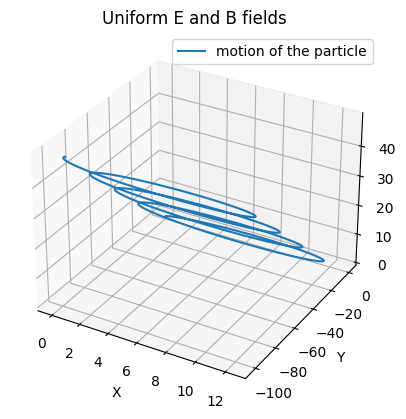

In [4]:
# Initial conditions
x0 = np.array([0.0, 0.0, 0.0])  # Initial position as a vector [x, y, z]
v0 = np.array([1.0, 1.0, 1.0])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.01  # Time step
num_steps = 5000  # Number of time steps

x, v, t = update_position(num_steps, dt, x0, v0, electric_field, magnetic_field)
#plot3D(x, 'Uniform E and B fields')

import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

ax.plot(x[:, 0], x[:, 1], x[:, 2], label='motion of the particle')
ax.legend()
ax.set_title('Uniform E and B fields');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Exercise 2: Line Charge and Magnetic Field

Calculate the motion of a particle in the steady state electric field produced by a line charge $\lambda$ along the $z$ axis and a steady state magnetic field 

$$\mathbf{B} = B_0 \hat{z}$$

Obtain an approximate solution using drift theory.

*Hint:* for the drift theory show that the electric field has the form 

$$\mathbf{E} = \frac{\lambda}{2 \pi r} \hat{r}$$

Assume that $\lambda$ is small for approximate solutions.

In [5]:
def electric_field_line(x, t):
    lum=1
    # modify this for a line charge
    Ex = lum/(2*np.pi*x[0])
    Ey = lum/(2*np.pi*x[1])
    Ez = lum/(2*np.pi*x[2])
    return np.array([Ex, Ey, Ez])
def magnetic_field(x, t):
    # Example: A uniform magnetic field in the z-direction
    Bx = 0.0
    By = 0.0
    Bz = 1.0
    return np.array([Bx, By, Bz])

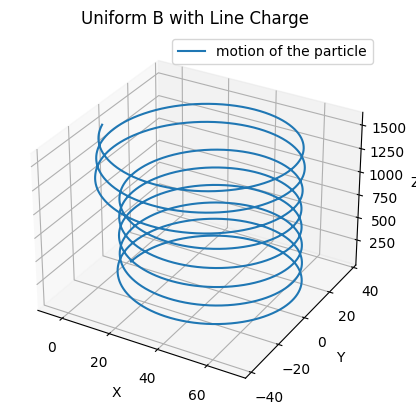

In [6]:
import numpy as np
# Initial conditions
x0 = np.array([2.0, 0.0001, 0.0001])  # Initial position as a vector [x, y, z]
v0 = np.array([0.0, 1.0, 0.0])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.01  # Time step
num_steps = 10000  # Number of time steps

x, v, t = update_position(num_steps, dt, x0, v0, electric_field_line, magnetic_field)
#plot3D(x, 'Uniform B with Line Charge')

import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

ax.plot(x[:, 0], x[:, 1], x[:, 2], label='motion of the particle')
ax.legend()
ax.set_title('Uniform B with Line Charge');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Exercise 3: Toroidal Coils

Consider the magnetic field produced by a toroidal coil system; this coil consists of a single wire threading the hole of a torus (donut) $N$ times with the $N$ turns evenly arranged around the circumference of the torus. Use Ampere’s law to show that the magnetic field is in the toroidal direction and has the form
$$
\mathbf{B} = \dfrac{\mu_0 NI}{2 \pi r} \hat{\phi}
$$
where $N$ is the total number of turns in the coil and $I$ is the current through the turn. What are the drifts for a particle having finite initial velocities both parallel and perpendicular to this toroidal field.

In [7]:
def electric_field_none(x, t):
    # zero E field
    return np.array([0,0,0])

def magnetic_field_toroidal(x, t):
    mu=1
    N=10
    I=1
    # B in toroidal direction
    Bx=-x[1]*mu*N*I/( 2 * np.pi * (x[0]**2 + x[1]**2) )
    By=x[0]*mu*N*I/( 2 * np.pi * (x[0]**2 + x[1]**2) )
    Bz=0
    return np.array([Bx, By, Bz])

In [8]:
# Initial conditions
x0 = np.array([1.0, 0.0, 0.0])  # Initial position as a vector [x, y, z]
v0 = 0.1*np.array([1, 1, 1])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.01  # Time step
num_steps = 10000  # Number of time steps

x, v, t = update_position(num_steps, dt, x0, v0, electric_field_none, magnetic_field_toroidal)
#plot3D(x, 'Toroidal B')

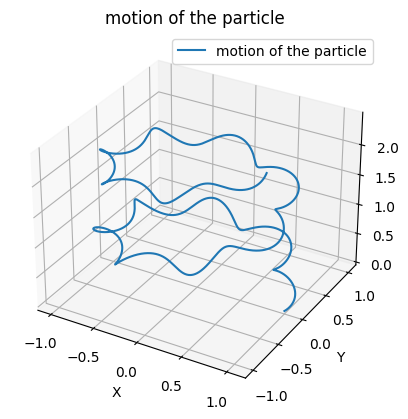

In [9]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

ax.plot(x[:, 0], x[:, 1], x[:, 2], label='motion of the particle')
ax.legend()
ax.set_title('motion of the particle');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Exercise 4: Magnetic Mirrors

<div style="text-align:center">
    <figure>
        <img src="mirrors.svg" alt="Magnetic Mirror" style="width: 600px;background-color: white;">
        <figcaption>Fig.2 Magnetic Mirror</figcaption>
    </figure>
</div>

A "magnetic mirror" field in cylindrical coordinates $r, \theta, z$ can be expressed as 

$$\mathbf{B}=(2 \pi)^{-1} \nabla \psi \times \nabla \theta$$ 

where

$$\psi=B_0 \pi r^2\left(1+\left(\dfrac{z}{L}\right)^2\right)$$

where $L$ is a characteristic length. 

#### Questions
1. Plot the contour of $\psi$.
2. Find the expression for the magnetic field $\mathbf{B}$.
2. Find the characteristic length, time, and velocity for an electron in this configuration.
3. Numerically integrate the orbit of an electron starting at $x=0, y=L, z=0$ with initial velocity $v_x=0$ and initial $v_y, v_z$ of the order of the characteristic velocity (try different values).
4. Plot the motion of the particle.
5. What interesting phenomena can be observed (e.g., reflection)?
6. Does the electron stay on a constant $\psi$ contour?

1. Plot the contour of $\psi$.

In [10]:
import numpy as np

B_0 = 1
L=1
r=np.linspace(-2,2,400)
z=np.linspace(-2,2,400)
R,Z = np.meshgrid(r,z)

def psi(r_s,z_s):
    psi = B_0 * np.pi * r_s**2 * ( 1+(z_s/L)**2 )
    return psi

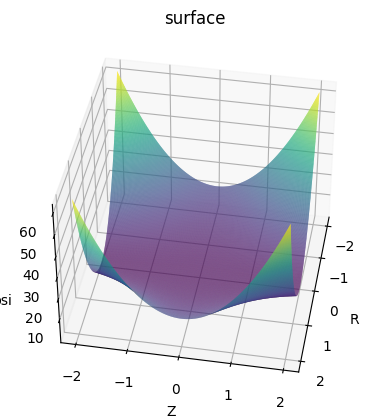

In [11]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()    
ax = plt.axes(projection='3d')

ax.plot_surface(R, Z, psi(R,Z), rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_title('surface');
ax.set_xlabel('R')
ax.set_ylabel('Z')
ax.set_zlabel('psi')

ax.view_init(40, 10)

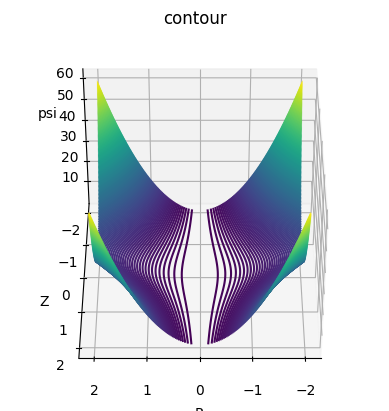

In [12]:
fig = plt.figure()    
ax = plt.axes(projection='3d')

ax.contour3D(R, Z, psi(R,Z), 200, cmap='viridis')
ax.set_title('contour');
ax.set_xlabel('R')
ax.set_ylabel('Z')
ax.set_zlabel('psi')

ax.view_init(40, 90)

2. Find the expression for the magnetic field $\mathbf{B}$.

In [13]:
# This import registers the 3D projection, but is otherwise unused.
import plotly.graph_objects as go 
import numpy as np

r=np.linspace(-2,2,400)
z=np.linspace(-2,2,400)
R,Z = np.meshgrid(r,z)

def magnetic_field_mirror2(r, z):
    Br = -( B_0*z*r / (L)**2 ) 
    Bz = B_0 * (1+(z/L)**2)
    
    return Br, Bz

#Bx, By, Bz= magnetic_field_mirror(0, Y, Z)

#Br, Bz= magnetic_field_mirror2(R, sate, Z)

Br, Bz= magnetic_field_mirror2(R, Z)

In [14]:
import plotly.figure_factory as ff

# Create streamline figure
fig = ff.create_streamline(r, z, Br, Bz, density=0.5, arrow_scale=.1, name='streamline')

fig.show()

3. Find the characteristic length, time, and velocity for an electron in this configuration.

In [15]:
# Magnetic Mirror
def electric_field_mirror(x, t):
    # zero E field
    Ex=0
    Ey=0
    Ez=0
    return np.array([Ex,Ey,Ez])

def magnetic_field_mirror2(x, t):
    Bx = -( B_0*x[2]*x[0] / ((L)**2) )
    By = -( B_0*x[2]*x[1] / ((L)**2) )
    Bz = B_0 * (1+(x[2]/L)**2)
    
    return np.array([Bx, By, Bz])

In [16]:
import numpy as np

# Initial conditions
x0 = np.array([0, 0, 0])  # Initial position as a vector [x, y, z]
v0 = np.array([0.1, 0.1, 0.1])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.01  # Time step

tmax=200

num_steps = int(tmax/dt)  # Number of time steps

x2, v2, t2 = update_position(num_steps, dt, x0, v0, electric_field_mirror, magnetic_field_mirror2)

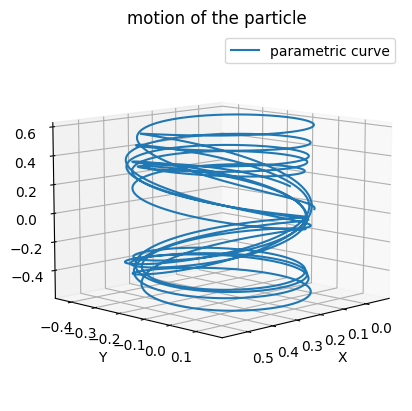

In [17]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

ax.plot(x2[:, 0], x2[:, 1], x2[:, 2], label='parametric curve')
ax.legend()
ax.set_title('motion of the particle');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(10, 45)

plt.show()

 the characteristic length, time, and velocity for an electron in this configuration
 $$
 is \ dt \leq 0.01 \ , \ L=1 \ , \ v=0.05^{1/2}
 $$

In [18]:
# Magnetic Mirror
def electric_field_mirror(x, t):
    # zero E field
    Ex=0
    Ey=0
    Ez=0
    return np.array([Ex,Ey,Ez])

def magnetic_field_mirror3(x,t):
    Br = -( B_0*x[2]*x[0] / (L)**2 ) 
    Bt = 0
    Bz = B_0 * (1+(x[2]/L)**2)
    
    return np.array([Br, Bt, Bz])

In [19]:
import numpy as np

# Initial conditions
x0 = np.array([0.37, 0.0, 0.0])  # Initial position as a vector [r, θ, z]
v0 = np.array([-0.2, -0.2, 0.15])  # Initial velocity as a vector [vr, vθ, vz]

# Time parameters
dt = 0.001  # Time step

tmax=200

num_steps = int(tmax/dt)  # Number of time steps

x3, v3, t3 = update_position(num_steps, dt, x0, v0, electric_field_mirror, magnetic_field_mirror3)

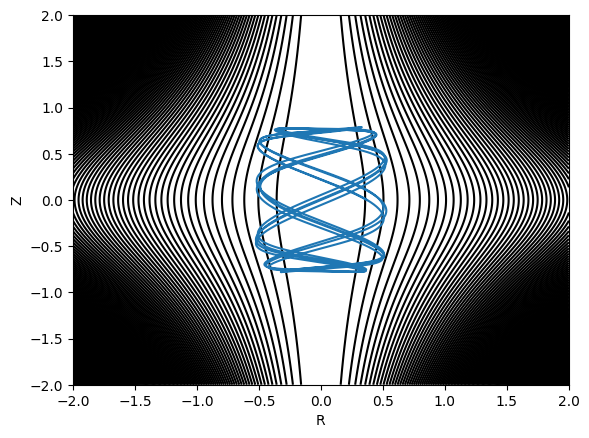

In [20]:
import numpy as np
import matplotlib.pyplot as plt

pl.contour(R, Z, psi(R,Z), 200, colors="k")

plt.plot(x3[:,0], x3[:,2])

plt.xlabel('R')
plt.ylabel("Z")

plt.show()

4. Numerically integrate the orbit of an electron starting at $x=0, y=L, z=0$ with initial velocity $v_x=0$ and initial $v_y, v_z$ of the order of the characteristic velocity (try different values).

In [21]:
import numpy as np

# Initial conditions
v=0.1
theta = np.linspace(0,90,10)

# Time parameters
dt = 0.001  # Time step

tmax=100

num_steps = int(tmax/dt)  # Number of time steps

#Matrix for collectdate path at any angle
x_angle = np.zeros([num_steps , 3 , len(theta)])
v_angle = np.zeros([num_steps , 3 , len(theta)])

for i in range(10):
    
    # Initial position as a vector [x, y, z]
    x0 = np.array([0.0, L, 0.0])
    # Initial velocity as a vector [vx, vy, vz]
    v0 = np.array([0.0, v*np.cos(np.pi*theta[i]/180), v*np.sin(np.pi*theta[i]/180)]) 
    
    #tranfrom coordinates
    r=(x0[0]**2 + x0[1]**2)**0.5
    θ=np.arctan2(x0[1],x0[0])
    
    vr=v0[1]
    vθ=0 #vθ alway zero because have v only y and z
  
    # Initial position as a vector [r, θ, z]
    x1 = np.array([r, θ, x0[2]])
    # Initial velocity as a vector [vr, vθ, vz]
    v1 = np.array([vr, vθ, v0[2]]) 

    x_angle[ :, :, i] , v_angle[ :, : , i] , t = update_position(num_steps, dt, x1, v1, electric_field_mirror, magnetic_field_mirror3)

5. Plot the motion of the particle.

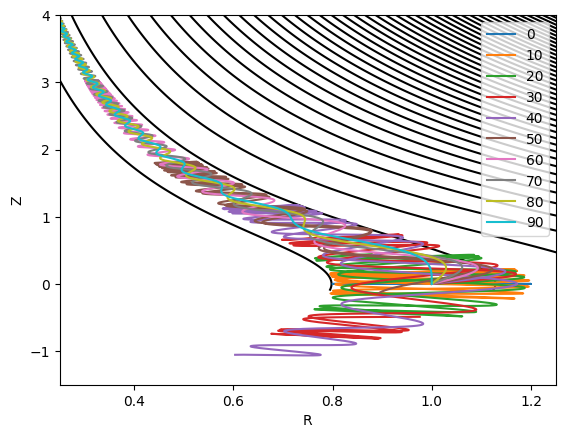

In [22]:
import numpy as np
import matplotlib.pyplot as plt
    
r=np.linspace(0,1.3,400)
z=np.linspace(-0.1,4,400)
R,Z = np.meshgrid(r,z)
    
pl.contour(R, Z, psi(R,Z), 50, colors="k")

n=[]
m=0
for i in range(0,10,1):
    n.append(m)
    plt.plot(x_angle[:, 0, i] , x_angle[:, 2, i],label=f"{m}" )
    m+=10

plt.xlim((0.25,1.25))
plt.ylim((-1.5,4))

plt.xlabel('R')
plt.ylabel("Z")

plt.legend()

plt.show()

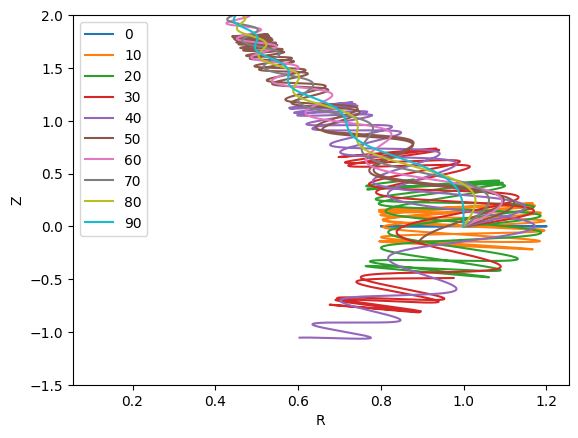

In [23]:
import numpy as np
import matplotlib.pyplot as plt
    
n=[]
m=0
for i in range(0,10,1):
    n.append(m)
    plt.plot(x_angle[:, 0, i] , x_angle[:, 2, i],label=f"{m}" )
    m+=10

#plt.xlim((0,1.3))
plt.ylim((-1.5,2))

plt.xlabel('R')
plt.ylabel("Z")

plt.legend()

plt.show()

6. What interesting phenomena can be observed (e.g., reflection)?
reflection, If theta more than 45 degree electron runaway from magnetic field.

In [24]:
import numpy as np

# Initial conditions
v=0.1
theta = np.linspace(40,60,10)

# Time parameters
dt = 0.001  # Time step

tmax=100

num_steps = int(tmax/dt)  # Number of time steps

#Matrix for collectdate path at any angle
x_angle = np.zeros([num_steps , 3 , len(theta)])
v_angle = np.zeros([num_steps , 3 , len(theta)])

for i in range(10):
    
    # Initial position as a vector [x, y, z]
    x0 = np.array([0.0, L, 0.0])
    # Initial velocity as a vector [vx, vy, vz]
    v0 = np.array([0.0, v*np.cos(np.pi*theta[i]/180), v*np.sin(np.pi*theta[i]/180)]) 
    
    #tranfrom coordinates
    r=(x0[0]**2 + x0[1]**2)**0.5
    θ=np.arctan2(x0[1],x0[0])
    
    vr=v0[1]
    vθ=0 #vθ alway zero because have v only y and z
  
    # Initial position as a vector [r, θ, z]
    x1 = np.array([r, θ, x0[2]])
    # Initial velocity as a vector [vr, vθ, vz]
    v1 = np.array([vr, vθ, v0[2]]) 

    x_angle[ :, :, i] , v_angle[ :, : , i] , t = update_position(num_steps, dt, x1, v1, electric_field_mirror, magnetic_field_mirror3)

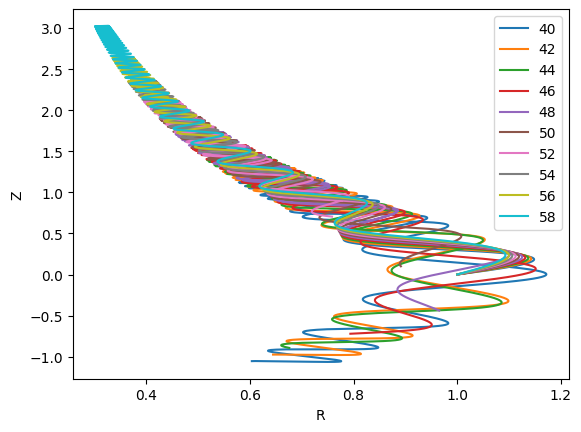

In [25]:
import numpy as np
import matplotlib.pyplot as plt
    
n=[]
m=40
for i in range(0,10,1):
    n.append(m)
    plt.plot(x_angle[:, 0, i] , x_angle[:, 2, i],label=f"{m}" )
    m+=2

#plt.xscale("log")
    
#plt.xlim((0,1.3))
#plt.ylim((-1.5,2))

plt.xlabel('R')
plt.ylabel("Z")

plt.legend()

plt.show()

7. Does the electron stay on a constant $\psi$ contour?
yes it is.

### Exercise 4: Magnetic Mirrors

<div style="text-align:center">
    <figure>
        <img src="mirrors.svg" alt="Magnetic Mirror" style="width: 600px;background-color: white;">
        <figcaption>Fig.2 Magnetic Mirror</figcaption>
    </figure>
</div>

A "magnetic mirror" field in cylindrical coordinates $r, \theta, z$ can be expressed as 

$$\mathbf{B}=(2 \pi)^{-1} \nabla \psi \times \nabla \theta$$ 

where

$$\psi=B_0 \pi r^2\left(1+\left(\dfrac{z}{L}\right)^2\right)$$

where $L$ is a characteristic length. 

### Exercise 5: Fermi Acceleration

>What happen if we slowly decrease the characteristic length $L$?

Consider the motion of a charged particle in the magnetic field
$$
\mathbf{B}=\frac{1}{2 \pi} \nabla \psi(r, z, t) \times \nabla \theta
$$
where
$$
\psi(r, z, t)=B_{\min } \pi r^2\left[1+2 \lambda \frac{\zeta^2}{\zeta^4+1}\right]
$$
and
$$
\zeta=\frac{z}{L(t)} .
$$

#### Questions
1. Show by explicit evaluation of the flux derivatives and also by plotting contours of constant flux that this is an example of a magnetic mirror field with minimum axial field $B_{\min }$ when $z=0$ and maximum axial field $\lambda B_{\min }$ at $z=L(t)$.
2. By making $L(t)$ a slowly decreasing function of time show that the magnetic mirrors slowly move together.
3. Calculate $\mathbf{E} (\mathbf{x}, t)$ and $\mathbf{B} (\mathbf{x}, t)$.
3. Using numerical techniques to integrate the equation of motion, demonstrate Fermi acceleration of a particle when the mirrors move slowly together.
4. Plot the velocity space angle at $z=0$ for each bounce between mirrors and show that the particle becomes detrapped when this angle decreases below $\theta_{\text {trap }}=\sin ^{-1}\left(\lambda^{-1}\right)$.

#### Hint
$$
\begin{align*}
L(t) &= L_0 - \alpha t \\ 
\mathbf{B} &= \frac{1}{2 \pi} \nabla \psi \times \nabla \theta\\
\mathbf{E} &= - \frac{\partial \mathbf{A}}{\partial t} \\
\mathbf{A} &= \frac{\psi}{2 \pi} \nabla \theta
\end{align*}
$$

1.plotting contours of constant flux that this is an example of a magnetic mirror field with minimum axial field $B_{\min }$ when $z=0$ and maximum axial field $\lambda B_{\min }$ at $z=L(t)$.

In [26]:
import numpy as np

#zeta=1 # z/L(t)
lamda=3
B_0 = 1
L=1
r=np.linspace(-2,2,400)
z=np.linspace(-2,2,400)
R,Z = np.meshgrid(r,z)


def psi(r_s, z_s):
    zeta = z_s / L
    psi = B_0 * np.pi * r_s**2 * ( 1+(2*lamda*(zeta**2/(zeta**4+1))) )
    return psi

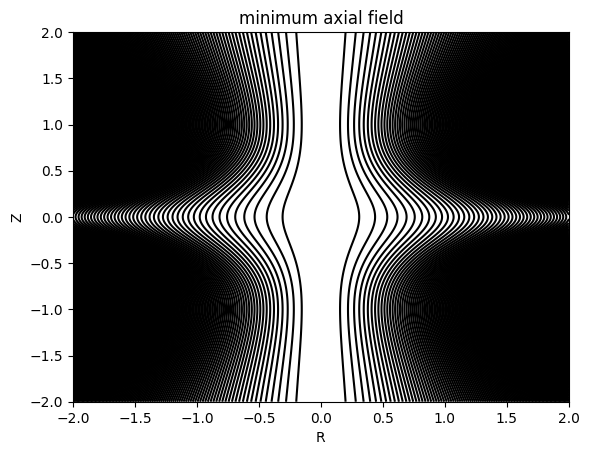

In [27]:
import numpy as np
import matplotlib.pyplot as plt

pl.contour(R, Z, psi(R,Z), 200, colors="k")

plt.title('minimum axial field')

plt.xlabel('R')
plt.ylabel("Z")

plt.show()

2. By making $L(t)$ a slowly decreasing function of time show that the magnetic mirrors slowly move together.

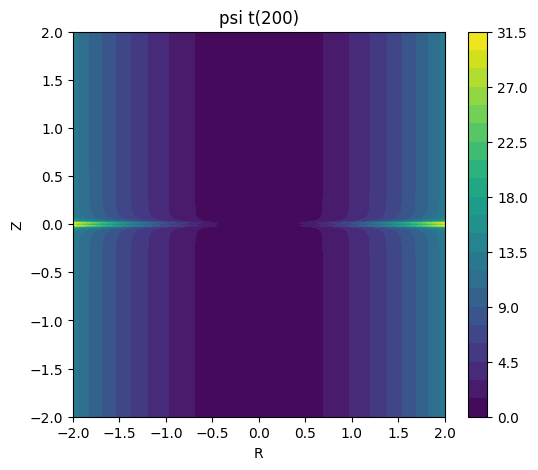

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

lamda=2
alpha=0.01
B_0 = 1
L0=2
r=np.linspace(-2,2,400)
z=np.linspace(-2,2,400)
t=np.linspace(0,201,201)
R,Z = np.meshgrid(r,z)


def psi(r_s, z_s, t):
    L=L0-(alpha*t)
    zeta = z_s / L
    psi = B_0 * np.pi * r_s**2 * ( 1+(2*lamda*(zeta**2/(zeta**4+1))) )
    return psi

phi_history = []
for i in range(len(t)):
    T=t[i]
    phi = psi(R, Z, T)
    
    # Save a copy of the current potential field for visualization
    phi_history.append(phi.copy())

fig, ax = plt.subplots(figsize = (6,5))
cbar = None
for t in range(len(phi_history)):
    if t % 10 == 0:
        ax.clear()
        im = ax.contourf(R, Z, phi_history[t], levels=20, cmap='viridis')
        ax.set_title(f'psi t({t})')
        ax.set_xlabel('R')
        ax.set_ylabel('Z')
        if cbar is not None:
            cbar.remove()
        cbar = fig.colorbar(im, ax=ax)
        display(fig)
        clear_output(wait=True)

3. Calculate $\mathbf{E} (\mathbf{x}, t)$ and $\mathbf{B} (\mathbf{x}, t)$.

In [29]:
def electric_field_fermi(x, t):
    L=L0-(alpha*t)
    zeta = x[2] / L
    
    Er = 0
    Et = -B_0*x[0]*lamda*2*alpha*zeta**2*(1-zeta**4) / (L*(zeta**4+1)**2)
    Ez = 0
    return np.array([Er, Et, Ez])

def electric_field_fermi2(x, t):
    L=L0-(alpha*t)
    zeta = x[2] / L
    
    r = np.sqrt(x[0]**2+x[1]**2)
    
    Er = 0
    Et = -B_0*r*lamda*2*alpha*zeta**2*(1-zeta**4) / (L*(zeta**4+1)**2)
    Ez = 0
    
    Ex = Et*x[1]/r # -e^_x = sin(Theta) e^_Theta
    Ey = Et*-x[0]/r # e^_y = cos(Theta) e^_Theta
    return np.array([Ex, Ey, Ez])

def magnetic_field_fermi(x, t):
    L=L0-(alpha*t)
    zeta = x[2] / L
    
    Br = -2*B_0*x[0]*lamda*zeta*(1-zeta**4) / ( L*(zeta**4+1)**2 )
    Bt = 0
    Bz = B_0*( 1+(2*lamda*(zeta**2/(zeta**4+1)**2)) )
    return np.array([Br, Bt, Bz])

def magnetic_field_fermi2(x, t):
    L=L0-(alpha*t)
    zeta = x[2] / L
    r = np.sqrt(x[0]**2+x[1]**2)
    
    Br = -2*B_0*r*lamda*zeta*(1-zeta**4) / ( L*(zeta**4+1)**2 )
    Bt = 0
    Bz = B_0*( 1+(2*lamda*(zeta**2/(zeta**4+1)**2)) )
    
    Bx = Br * x[0]/r 
    By = Br * x[1]/r
    return np.array([Bx, By, Bz])

Using numerical techniques to integrate the equation of motion, demonstrate Fermi acceleration of a particle when the mirrors move slowly together.

In [30]:
import numpy as np

# Initial conditions
x0 = np.array([0.15, -0.2, 0.0])  # Initial position as a vector [x, y, z]
v0 = np.array([-0.1, -0.1, 0.05])  # Initial velocity as a vector [vx, v, vz]

# Time parameters
dt = 0.001  # Time step

tmax=200

num_steps = int(tmax/dt)  # Number of time steps

x1, v1, t1 = update_position(num_steps, dt, x0, v0, electric_field_fermi2, magnetic_field_fermi2)

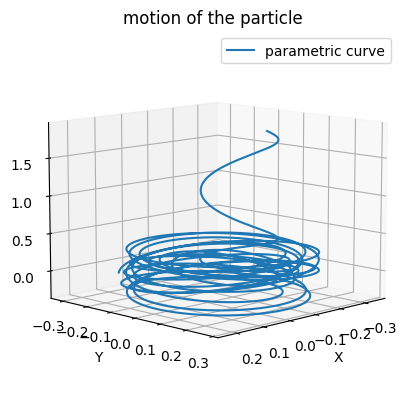

In [31]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

ax.plot(x1[:, 0], x1[:, 1], x1[:, 2], label='parametric curve')
ax.legend()
ax.set_title('motion of the particle');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(10, 45)

plt.show()

In [32]:
import numpy as np

# Initial conditions
x0 = np.array([0.15, 0.0, 0.0])  # Initial position as a vector [r, θ, z]
v0 = np.array([-0.1, -0.1, 0.05])  # Initial velocity as a vector [vr, vθ, vz]

# Time parameters
dt = 0.001  # Time step

tmax=200

num_steps = int(tmax/dt)  # Number of time steps

x2, v2, t2 = update_position(num_steps, dt, x0, v0, electric_field_fermi, magnetic_field_fermi)

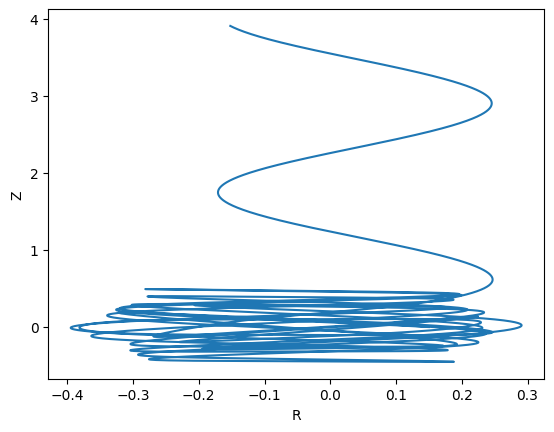

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x2[:,0], x2[:,2])

plt.xlabel('R')
plt.ylabel("Z")

plt.show()

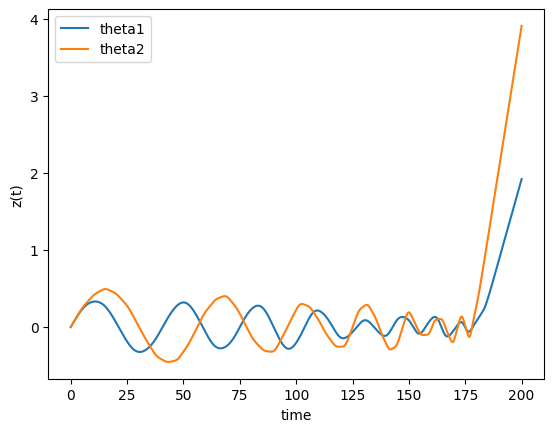

In [34]:
import matplotlib.pyplot as plt
plt.plot(t1,x1[:,2])
plt.plot(t2,x2[:,2])
plt.xlabel('time')
plt.ylabel("z(t)")

plt.legend([ 'theta1', 'theta2'] )

plt.show()

5. Plot the velocity space angle at $z=0$ for each bounce between mirrors and show that the particle becomes detrapped when this angle decreases below $\theta_{\text {trap }}=\sin ^{-1}\left(\lambda^{-1}\right)$.

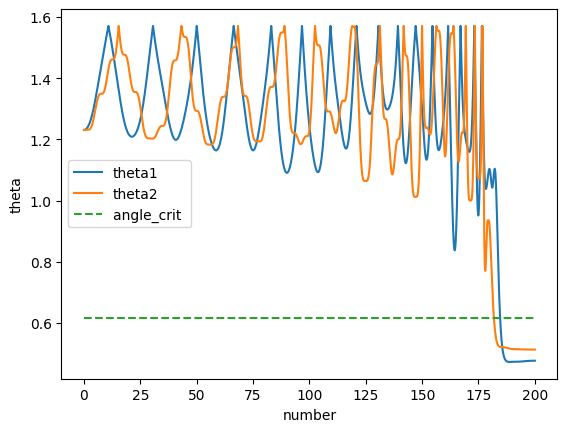

In [35]:
z1 = x1[:,2]
z2 = x2[:,2]

number1 = []
theta1 = []

number2 = []
theta2 = []

j=0
for i in range(len(t1)):
    j+=1
    number1.append(j)
    theta1.append( np.abs(np.arctan(  (v1[i,0]**2 + v1[i,1]**2)**(1/2)   /  v1[i,2])     ) )

j=0
for i in range(len(t2)):
    j+=1
    number2.append(j)
    theta2.append( np.abs(np.arctan(  (v2[i,0]**2 + v2[i,1]**2)**(1/2)   /  v2[i,2])     ) )
        
angle_crit = np.arcsin(1/np.sqrt(1+lamda))     
        
import matplotlib.pyplot as plt

plt.plot(t1 , theta1)
plt.plot(t2 , theta2)
plt.plot([t1[0], t1[len(t1)-1]] , [angle_crit , angle_crit], '--')
plt.xlabel('number')
plt.ylabel("theta")
plt.legend([ 'theta1', 'theta2', 'angle_crit '] )

### Exercise 6: Particle in Wave Fields

Use the numerical Lorentz solver to calculate the motion of a charged particle in a uniform magnetic field $\mathbf{B}=B \hat{z}$ and an electric field given by 

$$
\mathbf{E} = k \phi \sin(k y - \omega t) \hat{y}
$$

#### Questions
1. Compare the motion to the predictions of drift theory ($\mathbf{E} \times \mathbf{B}$, polarization).
2. Describe the motion for cases where $\alpha<<1, \alpha \simeq 1$, and $\alpha>>1$ where $\alpha=m k^2 \phi / q B^2$.
3. Describe what happens when $\alpha$ becomes of order unity.

In [36]:
import numpy as np

k = 1
phi = 1
omega = 0.1

def electric_field_wave(x, t):
    Ex = 0
    Ey = k*phi*np.sin((k*x[1]) - (omega*t))
    Ez = 0
    return np.array([Ex, Ey, Ez])

def magnetic_field_uniform(x, t):
    # uniform B field
    return np.array([0, 0, 1])

In [37]:
import numpy as np

# Initial conditions
x0 = np.array([0.0, 0.0, 0.0])  # Initial position as a vector [x, y, z]
v0 = np.array([0.1, 0.1, 0.1])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.001  # Time step

tmax=200

num_steps = int(tmax/dt)  # Number of time steps

x, v, t = update_position(num_steps, dt, x0, v0, electric_field_wave, magnetic_field_uniform)

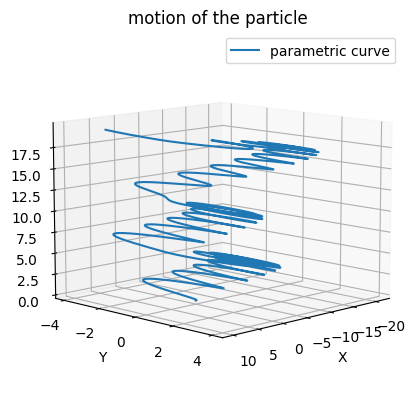

In [38]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

ax.plot(x[:, 0], x[:, 1], x[:, 2], label='parametric curve')
ax.legend()
ax.set_title('motion of the particle');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(10, 45)

plt.show()

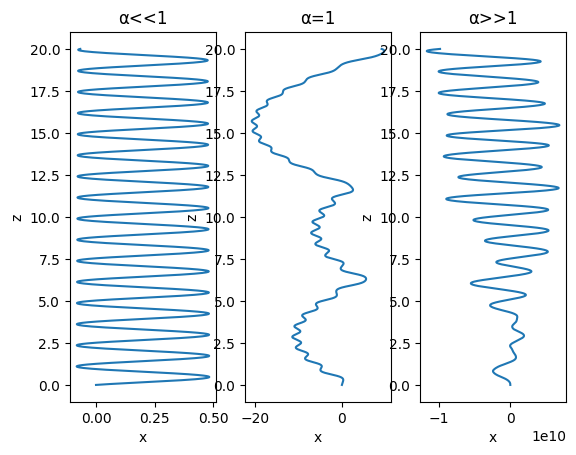

In [39]:
import numpy as np
import matplotlib.pyplot as plt

title=["α<<1","α=1","α>>1"]

φ = [1e-10, 1, 1e10]

# Initial conditions
x0 = np.array([0.0, 0.0, 0.0])  # Initial position as a vector [x, y, z]
v0 = np.array([0.1, 0.1, 0.1])  # Initial velocity as a vector [vx, vy, vz]

# Time parameters
dt = 0.001  # Time step

tmax=200

num_steps = int(tmax/dt)  # Number of time steps

for i in range(len(φ)):
    phi= φ[i]
    
    x, v, t = update_position(num_steps, dt, x0, v0, electric_field_wave, magnetic_field_uniform)
    
    plt.subplot(1,len(φ),int(i+1))
    plt.plot(x[:,0],x[:,2])
    plt.title(title[i])
    
    plt.xlabel('x')
    plt.ylabel("z")